<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import unicodedata
import random
from train import training
from util import load_data, evaluate,  df_tolist
from sklearn.utils import shuffle

In [2]:
# change to dataframe to Spacy format
# wikidata featured articles scraped text
df = pd.read_csv('E:/Sharpest_Mind/WikipediaCitation/notebooks/wiki_data.csv', encoding = 'utf8')
#df= df[(df['Statements'].str.split().str.len() >20)].reset_index(drop=True)
df = shuffle(df)
print(df.shape)
print(df.label.value_counts())
df.head()

(19998, 2)
1    9999
0    9999
Name: label, dtype: int64


,Statements,label
9197,Now that the Romans and Gauls had blooded one ...,1
7551,Immediately after Ismay's regiment returned fr...,1
2639,"In total, he scored 16 centuries—setting a rec...",1
17878,Enzymes may use several of these mechanisms si...,0
1742,When Angelou was concerned about what her read...,1


In [3]:
# Processing the final format of training and validation data
# Calling the load_data() function 
(train_texts, train_cats), (dev_texts, dev_cats) = load_data(df,split=0.8)
train_data = list(zip(train_texts,[{'cats': cats} for cats in train_cats]))
print(train_data[:1])
dev_data = list(zip(dev_texts,[{'cats': cats} for cats in dev_cats]))
print(dev_data[:1])


[('As Peter Bebergal explains in The Boston Globe, "Instead of fetishizing blood, Kostova fetishizes documents (manuscripts, maps, letters) and the places that house them (libraries, archives and monasteries)." As one critic explains, "the real horror rests in the possibility of what Dracula truly is"', {'cats': {'POSITIVE': True, 'NEGATIVE': False}})]
[(' Essential equipment from the Red Cross and the Pan American Health Organization was stored in the elevated UNICEF building and the Belize City UN building was converted to a crisis center.', {'cats': {'POSITIVE': True, 'NEGATIVE': False}})]


E:\Sharpest_Mind\WikipediaCitation\notebooks\util.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tuples'] = df.apply(lambda row: (row[df.columns[0]], row[df.columns[1]]), axis=1)


In [4]:
# Converting the dataframe into a list of tuples
# change to dataframe to Spacy format
# wikidata citation needed text
df1 = pd.read_csv('E:/Sharpest_Mind/WikipediaCitation/data/processed/csv_files/sort/Citation_needed_wiki.csv', encoding = 'ISO-8859-1')
df1 = shuffle(df1)
test1 =df_tolist(df1)
print(df1.shape)
random.shuffle(test1)

test_texts1, test_cats1 = zip(*test1[:8000])
test_cats1 = [{"POSITIVE": bool(y), "NEGATIVE": not bool(y)} for y in test_cats1]
test_data1 = list(zip(test_texts1,[{'cats': cats} for cats in test_cats1]))

(19998, 2)


In [5]:
# Converting the dataframe into a list of tuples
# wikidata random articles -biography section
df2 = pd.read_csv('E:/Sharpest_Mind/WikipediaCitation/data/processed/csv_files/sort/wiki_data_test.csv', encoding = 'ISO-8859-1')
df2 = shuffle(df2)
test2 =df_tolist(df2)
print(df2.shape)
random.shuffle(test2)

test_texts2, test_cats2 = zip(*test2[:8000])
test_cats2 = [{"POSITIVE": bool(y), "NEGATIVE": not bool(y)} for y in test_cats2]
test_data2 = list(zip(test_texts2,[{'cats': cats} for cats in test_cats2]))

(19980, 2)


In [6]:
print(len(train_data))
print(len(test_data1))
print(len(test_data2))
print(len(dev_data))

15998
8000
8000
4000


In [8]:
# Model 1 - Ensemble, L2 =2e-4
train_results1, dev_results1, test_results1 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts1, test_cats1, L2 = 2e-4, 
                                                     learn_rate = 0.001, output_dir='model_artifactnWikidataL2-2e-4')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  
13.9073	0.8868	0.9620	0.9204	0.9943	0.7790	0.8736
2.3184	0.9786	0.9757	0.9487	0.9829	0.9742	0.9786
1.4220	0.9823	0.9777	0.9492	0.9855	0.9792	0.9823
1.7185	0.9860	0.9772	0.9492	0.9783	0.9941	0.9862
1.5740	0.9840	0.9785	0.9482	0.9720	0.9969	0.9843
Saved model to model_artifactnWikidataL2-2e-4


In [15]:
### Model 2 - Ensemble, L2 0.0001 
train_results2, dev_results2, test_results2 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts2, test_cats2, L2 = 2e-3, 
                                                     learn_rate = 0.001, output_dir='model_artifactwikitest2-2e-3')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  
13.8150	0.9763	0.9682	0.9290	0.9609	0.9933	0.9768
3.1039	0.9779	0.9780	0.9370	0.9605	0.9969	0.9784
2.4054	0.9787	0.9785	0.9389	0.9618	0.9971	0.9792
2.1468	0.9776	0.9772	0.9394	0.9636	0.9928	0.9780
2.1722	0.9787	0.9775	0.9405	0.9625	0.9964	0.9791
Saved model to model_artifactwikitest2-2e-3


In [10]:
# Model 3
train_restul3, dev_results3, test_result3 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts1, test_cats1, L2 = 2e-4, 
                                                     learn_rate = 0.001, output_dir='model_artifactnewdataLensemble')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  
14.0433	0.9737	0.9362	0.8875	0.9636	0.9848	0.9741
2.6601	0.9824	0.9750	0.9455	0.9728	0.9928	0.9827
1.8663	0.9834	0.9772	0.9499	0.9712	0.9964	0.9837
1.7813	0.9841	0.9770	0.9499	0.9735	0.9954	0.9843
1.6244	0.9822	0.9775	0.9506	0.9697	0.9958	0.9826
Saved model to model_artifactnewdataLensemble


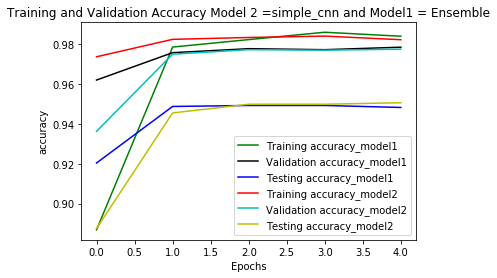

In [12]:
import matplotlib.pyplot as plt

accuracy_train = [(d['textcat_a']) for d in train_results1]
accuracy_dev = [(d['textcat_a']) for d in dev_results1]
accuracy_test = [(d['textcat_a']) for d in test_results1]
accuracy_train1 = [(d['textcat_a']) for d in train_restul3]
accuracy_dev1 = [(d['textcat_a']) for d in dev_results3]
accuracy_test1 = [(d['textcat_a']) for d in test_result3]
epochs = range(0,5)
plt.plot(epochs, accuracy_train, 'g', label='Train model1')
plt.plot(epochs, accuracy_dev, 'k', label='Val model1')
plt.plot(epochs, accuracy_test, 'b', label='Test model1')
plt.plot(epochs, accuracy_train1, 'r', label='Train model2')
plt.plot(epochs, accuracy_dev1, 'c', label='Vali model2')
plt.plot(epochs, accuracy_test1, 'y', label='Test model2')
plt.title('Training and Validation Accuracy Model 2 =simple_cnn and Model1 = Ensemble')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

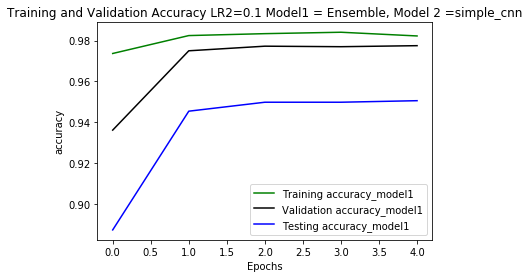

In [13]:
import matplotlib.pyplot as plt

accuracy_train = [(d['textcat_a']) for d in train_restul3]
accuracy_dev = [(d['textcat_a']) for d in dev_results3]
accuracy_test = [(d['textcat_a']) for d in test_result3]

epochs = range(0,5)
plt.plot(epochs, accuracy_train, 'g', label='Training accuracy_model1')
plt.plot(epochs, accuracy_dev, 'k', label='Validation accuracy_model1')
plt.plot(epochs, accuracy_test, 'b', label='Testing accuracy_model1')

plt.title('Training and Validation Accuracy LR2=0.1 Model1 = Ensemble, Model 2 =simple_cnn')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

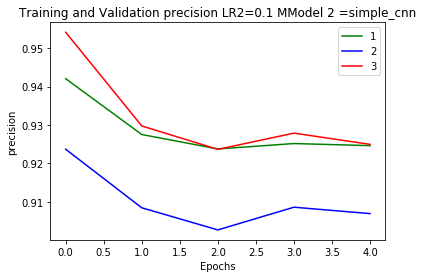

In [14]:
import matplotlib.pyplot as plt

precision_test1 = [(d['textcat_p']) for d in test_results1]
precision_test2 = [(d['textcat_p']) for d in test_results2]
precision_test3 = [(d['textcat_p']) for d in test_result3]
#precision_test4 = [(d['textcat_p']) for d in test_result4]

epochs = range(0,5)
plt.plot(epochs, precision_test1, 'g', label='1 - LR :2e-4&cnn')
plt.plot(epochs, precision_test2, 'b', label='2 - LR :2e-4&cnn')
plt.plot(epochs, precision_test3, 'r', label='3')
#plt.plot(epochs, precision_test4, 'c', label='4')
plt.title('Training and Validation precision 1 = =simple_cnn')
plt.xlabel('Epochs')
plt.ylabel('precision')
plt.legend()
plt.show()

In [30]:
# Testing the model = https://en.wikipedia.org/wiki/Che_Guevara - positive sentence
test_text= "Such positions also allowed him to play a central role in training the militia forces who repelled the Bay of Pigs Invasion and bringing the Soviet nuclear-armed ballistic missiles to Cuba which precipitated the 1962 Cuban Missile Crisis. "
doc=loaded_model(test_text)
doc.cats

{'POSITIVE': 0.9115933775901794, 'NEGATIVE': 0.08840657770633698}

In [18]:
import spacy


In [26]:
# Testing the model - negative sentence

loaded_model = spacy.load('E:/Sharpest_Mind/WikipediaCitation/notebooks/model_artifactwikitest2-2e-3')
test_text="Later, during the Age of Exploration, maps became progressively more accurate for navigation needs and were often sprinkled with sketches and drawings such as sailing ships showing the direction of trade winds, little trees and mounds to represent forests and mountains and of course, plenty of sea creatures and exotic natives much of them imaginary. As the need for geographical accuracy increased, these illustrations gradually slipped off the map and onto the borders and eventually disappeared altogether in the wake of modern scientific cartography."
doc=loaded_model(test_text)
doc.cats
#spacy.displacy.render(doc, style='ent')

{'POSITIVE': 0.22626976668834686, 'NEGATIVE': 0.7737302184104919}

In [28]:
#positive sentence 

test_text1 = 'Anthropomorphic maps date back to when Sebastian Münster used a queen to depict Europe in 1570.'
doc=loaded_model(test_text1)
doc.cats

{'POSITIVE': 0.924649178981781, 'NEGATIVE': 0.07535083591938019}